In [508]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [509]:
df=pd.read_csv('e-shop clothing 2008.csv')
df.head() 

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


Setelah Dilakukan Analisis data tersebut Data tersebut tidak ada missing values.



In [542]:
print(df.isnull().sum())

year                       0
Month                      0
Day                        0
order                      0
country                    0
session ID                 0
Type                       0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
Price                      0
price 2                    0
Page                       0
dtype: int64


Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
---

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [547]:
csdf = df[['month', 'day', 'page 1 (main category)', 'price', 'page']]
csdf = df.rename(columns={'month':'Month', 'day':'Day', 'page 1 (main category)':'Type',
                     'price':'Price', 'page':'Page'})
csdf.Type = csdf.Type.replace({1: 'Trousers', 2: 'Skirts', 3: 'Blouses', 4: 'Sale'})
csdf.Month = csdf.Month.replace({4: 'April', 5: 'May', 6: 'June', 7:'July', 8: 'August'})
csdf.Day = csdf.Day.replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'})

csdf.head()

,year,Month,Day,order,country,session ID,Type,page 2 (clothing model),colour,location,model photography,Price,price 2,Page
0,2008,April,Monday,1,29,1,Trousers,A13,1,5,1,28,2,1
1,2008,April,Monday,2,29,1,Trousers,A16,1,6,1,33,2,1
2,2008,April,Monday,3,29,1,Skirts,B4,10,2,1,52,1,1
3,2008,April,Monday,4,29,1,Skirts,B17,6,6,2,38,2,1
4,2008,April,Monday,5,29,1,Skirts,B8,4,3,2,52,1,1


Mengetahui jumlah kolom dan baris dari data.
---

In [548]:
csdf.shape

(165474, 14)

Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
---

In [549]:
csdf.describe()

,year,order,country,session ID,colour,location,model photography,Price,price 2,Page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,9.817476,26.952621,12058.417056,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,13.478411,7.150691,7008.418903,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,2.000000,29.000000,5931.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,6.000000,29.000000,11967.500000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,12.000000,29.000000,18219.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,195.000000,47.000000,24026.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


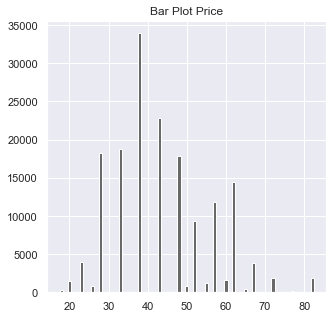

In [550]:
plt.bar(csdf.Price.value_counts().keys(), csdf.Price.value_counts().values, color='dimgray')
plt.title('Bar Plot Price')
plt.show()

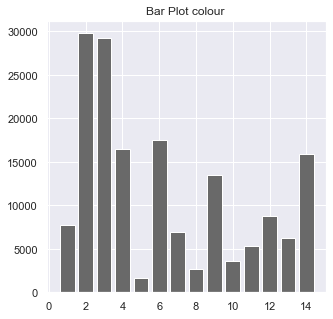

In [551]:
plt.bar(csdf.colour.value_counts().keys(), csdf.colour.value_counts().values, color='dimgray')
plt.title('Bar Plot colour ')
plt.show()

Analisa Data Distribusi eksplorasi dan persiapan data
---

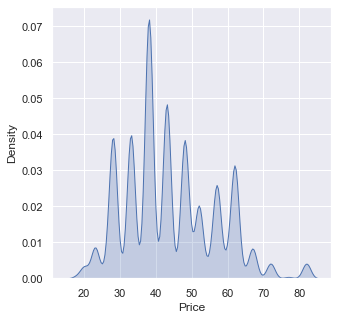

In [552]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(csdf['Price'],shade=True)

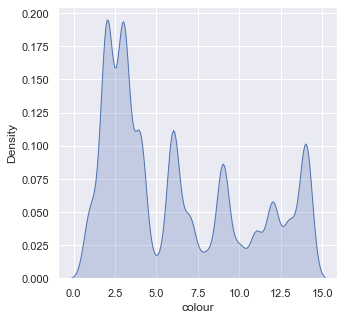

In [553]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['colour'],shade=True)



analisis menggunakan scatterplot
---  

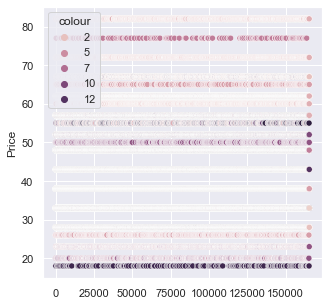

In [554]:
sns.scatterplot(x=df.index,y=csdf['Price'], hue=csdf['colour'])
plt.show()

Setelah Dilakukan Analisis Bisa Kita Lihat Bahwa Warna Colour 12 Harga Baju Dibawah 20.

Dimana untuk Warna Colour 10 Harga Baju 50 

 REGRESSION
--

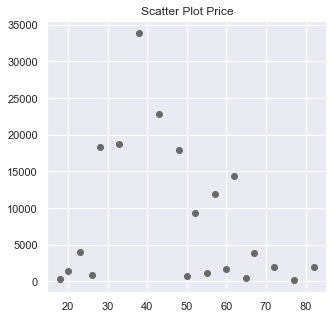

In [520]:
plt.scatter(csdf.Price.value_counts().keys(), csdf.Price.value_counts().values, color='dimgray')
plt.title('Scatter Plot Price')
plt.show()

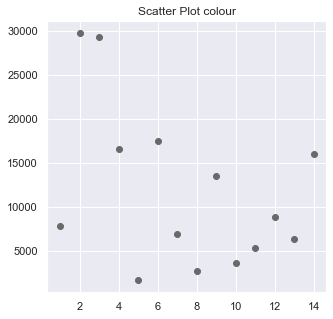

In [555]:
plt.scatter(csdf.colour.value_counts().keys(), csdf.colour.value_counts().values, color='dimgray')
plt.title('Scatter Plot colour')
plt.show()

In [522]:
csdf.corr()

,year,order,country,session ID,colour,location,model photography,Price,price 2,Page
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order,NaN,1.000000,-0.064709,0.021829,0.046427,0.014854,0.061820,-0.064779,0.000772,0.204106
country,NaN,-0.064709,1.000000,0.065869,0.009789,-0.009072,0.028725,-0.045345,-0.017536,0.026695
session ID,NaN,0.021829,0.065869,1.000000,-0.032034,-0.016721,0.010585,0.011669,-0.012742,0.023254
colour,NaN,0.046427,0.009789,-0.032034,1.000000,0.042062,0.074755,-0.091159,-0.080147,0.249322
location,NaN,0.014854,-0.009072,-0.016721,0.042062,1.000000,0.067678,-0.084653,0.073187,-0.091865
model photography,NaN,0.061820,0.028725,0.010585,0.074755,0.067678,1.000000,-0.212395,0.072944,0.258315
Price,NaN,-0.064779,-0.045345,0.011669,-0.091159,-0.084653,-0.212395,1.000000,-0.743633,-0.150455
price 2,NaN,0.000772,-0.017536,-0.012742,-0.080147,0.073187,0.072944,-0.743633,1.000000,0.029984
Page,NaN,0.204106,0.026695,0.023254,0.249322,-0.091865,0.258315,-0.150455,0.029984,1.000000


In [523]:
#Pertama, buat va|riabel x dan y.
x = csdf['colour'].values.reshape(-1,1)
y = csdf['Price'].values.reshape(-1,1)

tahap Modelling.
---

In [533]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Data dibagi menjadi 2 bagian: 
---
○ Data Latih (Training Data): untuk mengembangkan model

○ Data Uji (Testing Data): untuk Mengukur performansi model

In [534]:
print('Banyak Data latih setelah dilakukan train-test Split: ', len(x_train))
print('Banyak Data latih setelah dilakukan train-test Split: ', len(x_test))

Banyak Data latih setelah dilakukan train-test Split:  132379
Banyak Data latih setelah dilakukan train-test Split:  33095


object linear regresi.
---

In [535]:
regresilinear = LinearRegression()

training the model menggunakan training data yang sudah displit
---

In [536]:
regresilinear.fit(x_train, y_train)

LinearRegression()

In [537]:
print(regresilinear.coef_)
print(regresilinear.intercept_)

[[-0.26616599]]
[45.4527768]


Slope/koefisien (m) dan Intercept (b).

Slope = 163.84565026, Intercept = -3908.67363213.

In [538]:
regresilinear.score(x_test, y_test)

0.009190493216617912

nilai accuracy score sebesar 91%

Text(0.5, 1.0, 'Plot colour vs Price')

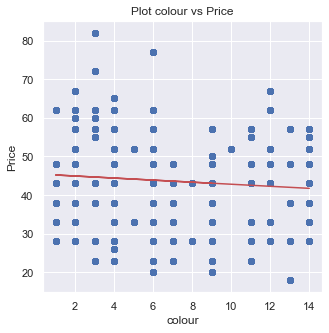

In [556]:
y_prediksi = regresilinear.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('colour')
plt.ylabel('Price')
plt.title('Plot colour vs Price')

lakukan prediksi harga baju dengan warna 10 dan 6
---

Prediksi harga baju dengan warna 10.
---

In [540]:
regresilinear.predict([[10]])

array([[42.79111694]])

Prediksi harga baju dengan warna 6.
---

In [541]:
regresilinear.predict([[6]])

array([[43.85578088]])

Bisa Kita Lihat Bahwa Harga Baju Warna 10 seharga 42 Ribu dan Untuk Warna 6 Harga Baju 43 Ribu